In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [2]:
torch.__version__

'1.12.0'

In [3]:
import numpy as np
from numpy.random import random

In [4]:
x = random((30,2))

# generate labels corresponding to input data x
y = np.dot(x, [2., -3.]) + 1.
w_source = np.array([2., -3.])
b_source  = np.array([1.])

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    #Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    plt.show()

/tmp/ipykernel_1413/2076442370.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=elev, azim=azim)


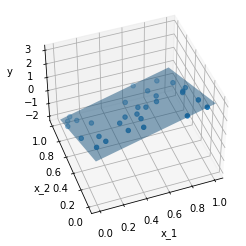

In [6]:
plot_views(x, y, w_source, b_source)

In [8]:
w_init = random(2)
b_init = random(1)

w = w_init
b = b_init
print("initial values of the parameters:", w, b )

initial values of the parameters: [0.78293837 0.87010485] [0.00864384]


In [10]:
def forward(x):
    return x.dot(w)+b

#loss function
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)**2

def gradient(x,y): # d_loss/d_w, d_loss/d_c
    return 2*(x.dot(w)+b-y)*x, 2*(x.dot(w)+b-y)

learning_rate = 1e-2

for epoch in range(30):
    grad_w = np.array([0,0])
    grad_b = np.array(0)

    l = 0

    for x_val,y_val in zip(x,y):
        grad_w = np.add(grad_w,gradient(x_val,y_val)[0])
        grad_b = np.add(grad_b,gradient(x_val,y_val)[1])
        l+=loss(x_val,y_val)
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    print('progress:', "epoch", epoch,'loss',l[0])

print('estimation of the parameters:',w,b)
        

progress: epoch 0 loss 13.940734335876897
progress: epoch 1 loss 12.645182741183545
progress: epoch 2 loss 11.489266237650712
progress: epoch 3 loss 10.45671404575372
progress: epoch 4 loss 9.533218125609537
progress: epoch 5 loss 8.706193030417893
progress: epoch 6 loss 7.964565307844874
progress: epoch 7 loss 7.298588805760718
progress: epoch 8 loss 6.699682688420589
progress: epoch 9 loss 6.160289363338214
progress: epoch 10 loss 5.673749864602784
progress: epoch 11 loss 5.234194541236992
progress: epoch 12 loss 4.836447164655511
progress: epoch 13 loss 4.475940801974221
progress: epoch 14 loss 4.14864400588732
progress: epoch 15 loss 3.850996050618666
progress: epoch 16 loss 3.579850100173791
progress: epoch 17 loss 3.3324233324947268
progress: epoch 18 loss 3.106253163539502
progress: epoch 19 loss 2.8991588208652694
progress: epoch 20 loss 2.709207608823383
progress: epoch 21 loss 2.5346852885848175
progress: epoch 22 loss 2.3740700673148822
progress: epoch 23 loss 2.226009753142

/tmp/ipykernel_1413/2076442370.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=elev, azim=azim)


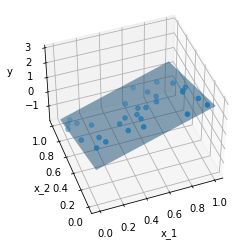

In [11]:
plot_views(x, y, w, b)

In [12]:
dtype = torch.FloatTensor

In [13]:
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

In [15]:
w_init_t = torch.from_numpy(w_init).type(dtype)
b_init_t = torch.from_numpy(b_init).type(dtype)

w_t = w_init_t.clone()
w_t.unsqueeze_(1)
b_t = b_init_t.clone()
b_t.unsqueeze_(1)
print('initial value pf the parameters',w_t,b_t)

initial value pf the parameters tensor([[0.7829],
        [0.8701]]) tensor([[0.0086]])


In [20]:
def forward_t(x):
    return x.mm(w_t)+b_t

def loss_t(x,y):
    y_pred = forward_t(x)
    return (y_pred-y).pow(2).sum()

def gradient_t(x,y):
    return 2*torch.mm(torch.t(x), x.mm(w_t)+b_t-y), 2*(x.mm(w_t)+b_t-y).sum()

learning_rate=1e-2
for epoch in range(10):
    l_t = loss_t(x_t,y_t)
    grad_w,grad_b = gradient_t(x_t,y_t)
    w_t = w_t - learning_rate*grad_w
    b_t = b_t - learning_rate*grad_b
    print('process:','epoch', epoch, 'loss', l_t)

print("estimation of the parameters:", w_t,b_t)

process: epoch 0 loss tensor(45.1839)
process: epoch 1 loss tensor(36.0007)
process: epoch 2 loss tensor(32.1895)
process: epoch 3 loss tensor(28.8445)
process: epoch 4 loss tensor(25.8826)
process: epoch 5 loss tensor(23.2578)
process: epoch 6 loss tensor(20.9299)
process: epoch 7 loss tensor(18.8634)
process: epoch 8 loss tensor(17.0273)
process: epoch 9 loss tensor(15.3944)
estimation of the parameters: tensor([[ 1.6047],
        [-0.5623]]) tensor([[-0.0781]])


In [21]:
w_v = w_init_t.clone().unsqueeze(1)
w_v.requires_grad_(True)
b_v = b_init_t.clone().unsqueeze(1)
b_v.requires_grad_(True)
print("initial values of the parameters:", w_v.data, b_v.data )

initial values of the parameters: tensor([[0.7829],
        [0.8701]]) tensor([[0.0086]])


In [22]:
for epoch in range(10):
    y_pred = x_t.mm(w_v)+b_v
    loss = (y_pred - y_t).pow(2).sum()
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w.grad and b.grad will be tensors holding the gradient
    # of the loss with respect to w and b respectively.
    loss.backward()
    
    # Update weights using gradient descent. For this step we just want to mutate
    # the values of w_v and b_v in-place; we don't want to build up a computational
    # graph for the update steps, so we use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates
    with torch.no_grad():
        w_v -= learning_rate * w_v.grad
        b_v -= learning_rate * b_v.grad
    
    # Manually zero the gradients after updating weights
    # otherwise gradients will be acumulated after each .backward()
    w_v.grad.zero_()
    b_v.grad.zero_()
    
    print("progress:", "epoch:", epoch, "loss",loss.data.item())

# After training
print("estimation of the parameters:", w_v.data, b_v.data.t() )

progress: epoch: 0 loss 45.18392562866211
progress: epoch: 1 loss 36.00069808959961
progress: epoch: 2 loss 32.18950653076172
progress: epoch: 3 loss 28.84449577331543
progress: epoch: 4 loss 25.882617950439453
progress: epoch: 5 loss 23.25782585144043
progress: epoch: 6 loss 20.929859161376953
progress: epoch: 7 loss 18.863374710083008
progress: epoch: 8 loss 17.027318954467773
progress: epoch: 9 loss 15.394426345825195
estimation of the parameters: tensor([[ 1.6047],
        [-0.5623]]) tensor([[-0.0781]])


In [27]:
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

In [30]:
model = torch.nn.Sequential(torch.nn.Linear(2,1),)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()


loss_fn = torch.nn.MSELoss(reduction='sum')

model.train()

for epoch in range(10):
    y_pred = model(x_t)
    loss = loss_fn(y_pred,y_t)
    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate *param.grad
    print('process:', "epoch", epoch, 'loss', loss.data.item())

print("estimation of the parameters:")
for param in model.parameters():
    print(param)

process: epoch 0 loss 45.18392562866211
process: epoch 1 loss 36.00069808959961
process: epoch 2 loss 32.18950653076172
process: epoch 3 loss 28.84449577331543
process: epoch 4 loss 25.882617950439453
process: epoch 5 loss 23.25782585144043
process: epoch 6 loss 20.929859161376953
process: epoch 7 loss 18.863374710083008
process: epoch 8 loss 17.027318954467773
process: epoch 9 loss 15.394426345825195
estimation of the parameters:
Parameter containing:
tensor([[ 1.6047, -0.5623]], requires_grad=True)
Parameter containing:
tensor([-0.0781], requires_grad=True)


In [31]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

loss_fn = torch.nn.MSELoss(reduction='sum')

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(10):
    y_pred = model(x_t)
    loss = loss_fn(y_pred, y_t)
    print("progress:", "epoch", epoch, "loss",loss.item())
    optimizer.zero_grad
    loss.backward()
    optimizer.step()


print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch 0 loss 45.18392562866211
progress: epoch 1 loss 36.00069808959961
progress: epoch 2 loss 32.55109405517578
progress: epoch 3 loss 24.995317459106445
progress: epoch 4 loss 11.194703102111816
progress: epoch 5 loss 8.197527885437012
progress: epoch 6 loss 8.88558292388916
progress: epoch 7 loss 5.46051549911499
progress: epoch 8 loss 12.43312931060791
progress: epoch 9 loss 23.793659210205078
estimation of the parameters:
Parameter containing:
tensor([[ 4.0920, -4.8222]], requires_grad=True)
Parameter containing:
tensor([0.6377], requires_grad=True)


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=1)

    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

    

In [36]:
MLP()

MLP(
  (fc1): Linear(in_features=2, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)

In [41]:
model = MLP()
input = torch.empty(12,2).normal_()
output = model(input)


In [48]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

output = model(input)

loss = loss_fn(output,label)
optimizer.zero_grad()
loss.backward()
optimizer.step()



In [49]:
loss

tensor(2.0416, grad_fn=<MseLossBackward0>)

In [46]:
label = torch.empty(12,1).normal_()

In [47]:
label

tensor([[ 0.5798],
        [ 2.1073],
        [ 1.3396],
        [ 0.0752],
        [-1.3879],
        [ 1.0132],
        [-0.2358],
        [-2.5837],
        [-0.7668],
        [-1.4211],
        [ 1.5044],
        [-0.4838]])